##Context

This Dataset contains the weather history of USA from year 2006 to year 2016. The objective is to predict the weather temperature of USA based on other features. 

###Content

In this dataset, we have 12 Columns :
######Formatted Date
######Summary
######Precip Type
######Temperature (C)
######Apparent Temperature (C)
######Humidity
######Wind Speed (km/h)
######Wind Bearing (degrees)
######Visibility (km)
######Loud Cover
######Pressure (millibars)
######Daily Summary

###Import the Libraries

In [ ]:
# Import the liabraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Load the Dataset
data=pd.read_csv('/content/weatherHistory.csv')

###Data Description

In [ ]:
# Top 5 Rows
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
# Describe the Data(Only Continuous columns)
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
# Describe the Data(All columns)
data.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,96453,96453,95936,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453
unique,96429,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 08:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,NaN
std,NaN,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN
50%,NaN,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,NaN


In [ ]:
# Data type of Each Column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
# Shape of the Data(No. of Rows and Columns)
data.shape

(96453, 12)

###Data Cleaning

In [ ]:
# Finding the missing values
data.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
# Find the mode of the categorical column to replace missing value with the mostly present value within the column
data['Precip Type'].mode()

0    rain
dtype: object

In [ ]:
# Replace missing value with the mode value
data['Precip Type'].fillna(value='rain',inplace=True)

In [ ]:
data.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

###Exploratory Data Analysis###

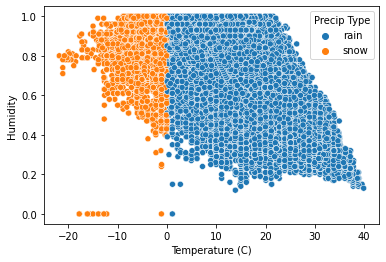

In [ ]:
# relationship between two Independant variables with one categorical independant variable
sns.scatterplot(y='Humidity',x='Temperature (C)',data=data,hue='Precip Type')
plt.show()

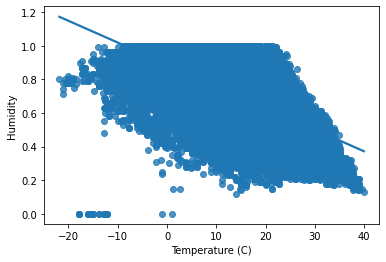

In [ ]:
# plotting a scatter plot between temp and humdity
sns.regplot(x=data["Temperature (C)"], y=data["Humidity"])

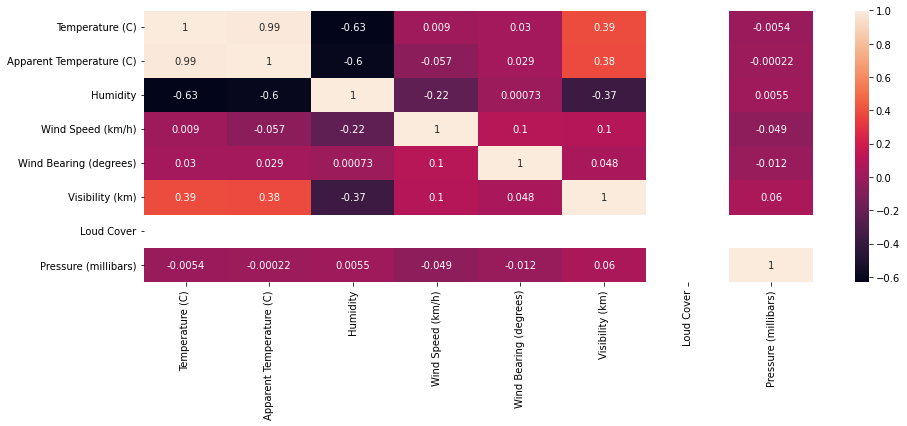

In [ ]:
# Using Scatterplot to find the relationship between Dependant and Independant variables 
plt.figure(figsize=(15,5))
sns.heatmap(data[[ 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)']].corr(),annot=True)

###Outliers Detection and treatment###

Column Temperature (C)

In [ ]:
def plot_boxplot(df,ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

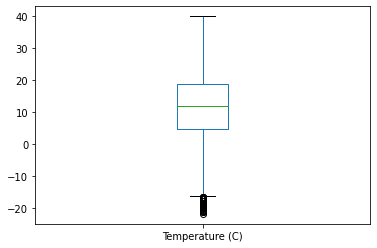

In [ ]:
plot_boxplot(data,'Temperature (C)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


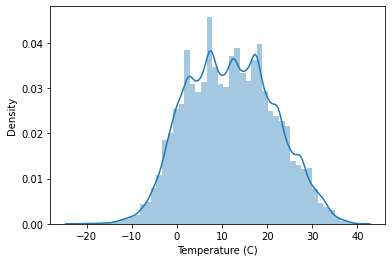

In [ ]:
sns.distplot(data['Temperature (C)'])

In [ ]:
data['Temperature (C)'].describe()

count    96453.000000
mean        11.932678
std          9.551546
min        -21.822222
25%          4.688889
50%         12.000000
75%         18.838889
max         39.905556
Name: Temperature (C), dtype: float64

In [ ]:
def detect_outlier(df,fun):
  IQR=df[fun].quantile(0.75)-df[fun].quantile(0.25)
  lower_bridge=df[fun].quantile(0.25)-(IQR*1.5)
  upper_bridge=df[fun].quantile(0.75)+(IQR*1.5)
  print(lower_bridge), print(upper_bridge)

In [ ]:
detect_outlier(data,'Temperature (C)')

-16.536111111111122
40.0638888888889


In [ ]:
# Capiing the outliers
data.loc[data['Temperature (C)']<-16,'Temperature (C)']=-16

In [ ]:
data['Temperature (C)'].describe()

count    96453.000000
mean        11.933899
std          9.547750
min        -16.000000
25%          4.688889
50%         12.000000
75%         18.838889
max         39.905556
Name: Temperature (C), dtype: float64

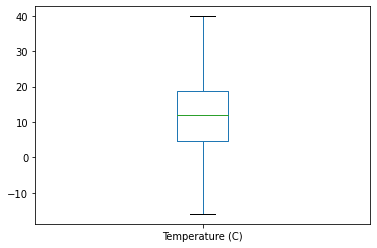

In [ ]:
plot_boxplot(data,'Temperature (C)')

Column Apparent Temperature (C)

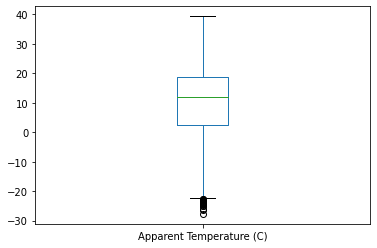

In [ ]:
plot_boxplot(data,'Apparent Temperature (C)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


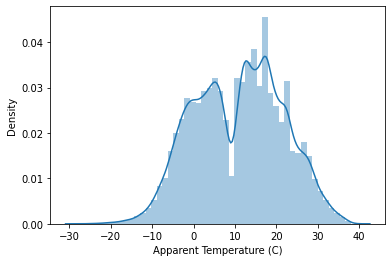

In [ ]:
sns.distplot(data['Apparent Temperature (C)'])

In [ ]:
def detect_outlier(df,fun):
  IQR=df[fun].quantile(0.75)-df[fun].quantile(0.25)
  lower_bridge=df[fun].quantile(0.25)-(IQR*1.5)
  upper_bridge=df[fun].quantile(0.75)+(IQR*1.5)
  print(lower_bridge), print(upper_bridge)

In [ ]:
detect_outlier(data,'Apparent Temperature (C)')

-22.48055555555556
43.63055555555556


In [ ]:
data['Apparent Temperature (C)'].describe()

count    96453.000000
mean        10.855029
std         10.696847
min        -27.716667
25%          2.311111
50%         12.000000
75%         18.838889
max         39.344444
Name: Apparent Temperature (C), dtype: float64

In [ ]:
data.loc[data['Apparent Temperature (C)']<-22,'Apparent Temperature (C)']=-22

In [ ]:
data['Apparent Temperature (C)'].describe()

count    96453.000000
mean        10.855528
std         10.695248
min        -22.000000
25%          2.311111
50%         12.000000
75%         18.838889
max         39.344444
Name: Apparent Temperature (C), dtype: float64

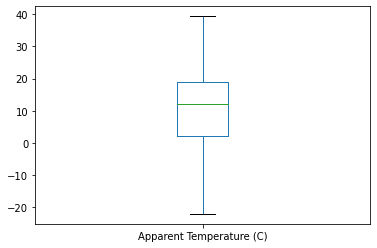

In [ ]:
plot_boxplot(data,'Apparent Temperature (C)')

Column Humidity

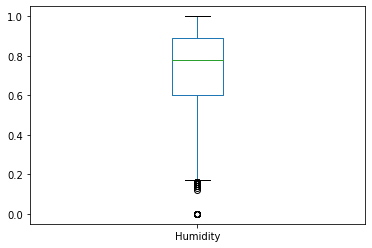

In [ ]:
plot_boxplot(data,'Humidity')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


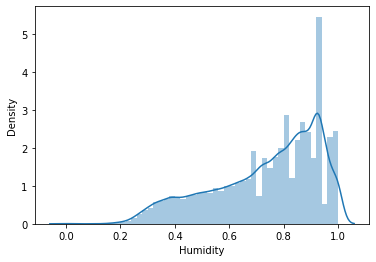

In [ ]:
sns.distplot(data['Humidity'])

In [ ]:
data['Humidity'].describe()

count    96453.000000
mean         0.734899
std          0.195473
min          0.000000
25%          0.600000
50%          0.780000
75%          0.890000
max          1.000000
Name: Humidity, dtype: float64

In [ ]:
detect_outlier(data,'Humidity')

0.16499999999999992
1.3250000000000002


In [ ]:
data.loc[data['Humidity']<0.165,'Humidity']=0.165

In [ ]:
data['Humidity'].describe()

count    96453.000000
mean         0.734940
std          0.195336
min          0.165000
25%          0.600000
50%          0.780000
75%          0.890000
max          1.000000
Name: Humidity, dtype: float64

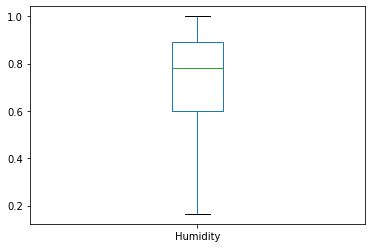

In [ ]:
plot_boxplot(data,'Humidity')

Column Wind Speed (km/h)

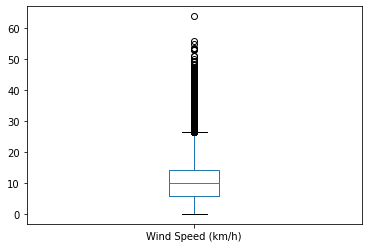

In [ ]:
plot_boxplot(data,'Wind Speed (km/h)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


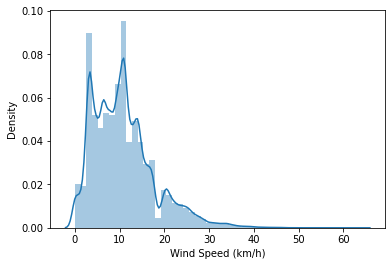

In [ ]:
sns.distplot(data['Wind Speed (km/h)'])

In [ ]:
data['Wind Speed (km/h)'].describe()

count    96453.000000
mean        10.810640
std          6.913571
min          0.000000
25%          5.828200
50%          9.965900
75%         14.135800
max         63.852600
Name: Wind Speed (km/h), dtype: float64

In [ ]:
detect_outlier(data,'Wind Speed (km/h)')

-6.633199999999994
26.597199999999994


In [ ]:
data.loc[data['Wind Speed (km/h)']>26.597,'Wind Speed (km/h)']=26.597

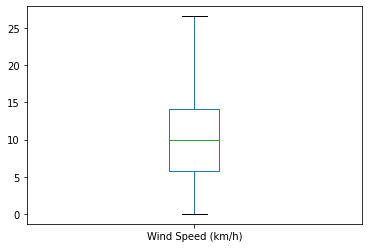

In [ ]:
plot_boxplot(data,'Wind Speed (km/h)')

Column Wind Bearing (degrees)

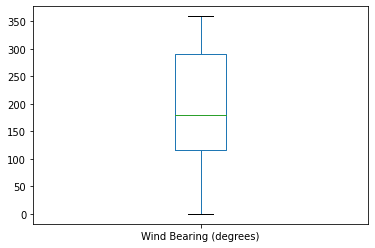

In [ ]:
plot_boxplot(data,'Wind Bearing (degrees)')

Column Visibility (km)

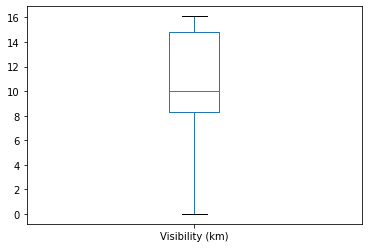

In [ ]:
plot_boxplot(data,'Visibility (km)')

Column Loud Cover

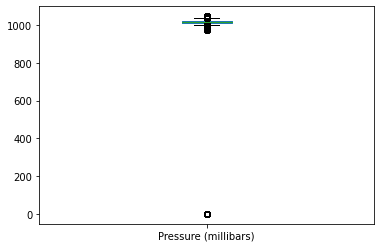

In [ ]:
plot_boxplot(data,'Pressure (millibars)')

In [ ]:
data['Pressure (millibars)'].describe()

count    96453.000000
mean      1003.235956
std        116.969906
min          0.000000
25%       1011.900000
50%       1016.450000
75%       1021.090000
max       1046.380000
Name: Pressure (millibars), dtype: float64

In [ ]:
detect_outlier(data,'Pressure (millibars)')

998.1149999999999
1034.875


In [ ]:
data.loc[data['Pressure (millibars)']<999,'Pressure (millibars)']=999

In [ ]:
data.loc[data['Pressure (millibars)']>1034,'Pressure (millibars)']=1034

In [ ]:
data['Pressure (millibars)'].describe()

count    96453.000000
mean      1016.563272
std          7.624977
min        999.000000
25%       1011.900000
50%       1016.450000
75%       1021.090000
max       1034.000000
Name: Pressure (millibars), dtype: float64

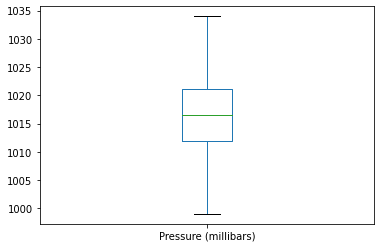

In [ ]:
plot_boxplot(data,'Pressure (millibars)')

In [ ]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
# =============================================================================
# Creating the Independendent and Dependent Data Sets
# =============================================================================
y= data.iloc[:,[3]] # Dependent Data
X= data.iloc[:,[2,4,5,6,7,8,9,10]] #Feature Data

X1= pd.get_dummies(X, columns =['Precip Type'],drop_first=True)

In [ ]:
X1.columns

Index(['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Precip Type_snow'],
      dtype='object')

### Deployment of Linea Regression Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X1_train,X1_test,y_train,y_test=train_test_split(X1,y,test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X1_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X1_test)

In [ ]:
y_test.head()

,Temperature (C)
59687,7.266667
83092,17.755556
3585,-1.161111
93980,14.938889
63499,-1.788889


In [ ]:
y_pred[0:5]

array([[ 6.57430287],
       [17.46090383],
       [ 0.52652578],
       [14.66800075],
       [-2.55651571]])

###Measuring Accuracy of the Model

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test,y_pred)

0.893851627863794